<a href="https://colab.research.google.com/github/gsujal421/Primetrade.ai-Assignment/blob/main/PrimeTrade_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [640]:
# from google.colab import files
# uploaded= files.upload()

#Trader Behavior Insights

Importing all necessary libraries

In [641]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

Data Loading

In [642]:
data1= pd.read_csv('fear_greed_index.csv',encoding='latin1')
data2= pd.read_csv('historical_data.csv', encoding='latin1')

In [643]:
data1.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [644]:
data2.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [645]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [646]:
data1.shape

(2644, 4)

In [647]:
data2.shape

(211224, 16)

Removing Extra Space

In [648]:
data1.columns = data1.columns.str.strip().str.replace(" ", "_").str.lower()

In [649]:
data2.columns = data2.columns.str.strip().str.replace(" ", "_").str.lower()

Performing Time-Series Analysis

In [650]:
data1['date']=pd.to_datetime(data1['date'])
print(data1['date'].dtype)

datetime64[ns]


In [651]:
data1['timestamp']=pd.to_datetime(data1['timestamp'],unit='s')
print(data1['timestamp'].dtype)

datetime64[ns]


In [652]:
data1.head()

,timestamp,value,classification,date
0,2018-02-01 05:30:00,30,Fear,2018-02-01
1,2018-02-02 05:30:00,15,Extreme Fear,2018-02-02
2,2018-02-03 05:30:00,40,Fear,2018-02-03
3,2018-02-04 05:30:00,24,Extreme Fear,2018-02-04
4,2018-02-05 05:30:00,11,Extreme Fear,2018-02-05


In [653]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   timestamp       2644 non-null   datetime64[ns]
 1   value           2644 non-null   int64         
 2   classification  2644 non-null   object        
 3   date            2644 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(1)
memory usage: 82.8+ KB


Feature Engineering

In [654]:
data1['classification'].value_counts()

,count
classification,
Fear,781
Greed,633
Extreme Fear,508
Neutral,396
Extreme Greed,326


In [655]:
def fear(s):
  if s=='Fear' or s=='Extreme Fear':
    return "Fear"
  elif s== 'Greed' or s== 'Extreme Greed':
    return 'Greed'
  else:
    return 'Neutral'

In [656]:
data1['sentiment']=data1['classification'].apply(fear)

In [657]:
data1['sentiment'].value_counts()

,count
sentiment,
Fear,1289
Greed,959
Neutral,396


In [658]:
del data1['classification']

In [659]:
print(data1.isnull().sum())
print(data1.duplicated().sum())

timestamp    0
value        0
date         0
sentiment    0
dtype: int64
0


In [660]:
data2.head()

,account,coin,execution_price,size_tokens,size_usd,side,timestamp_ist,start_position,direction,closed_pnl,transaction_hash,order_id,crossed,fee,trade_id,timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [661]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   account           211224 non-null  object 
 1   coin              211224 non-null  object 
 2   execution_price   211224 non-null  float64
 3   size_tokens       211224 non-null  float64
 4   size_usd          211224 non-null  float64
 5   side              211224 non-null  object 
 6   timestamp_ist     211224 non-null  object 
 7   start_position    211224 non-null  float64
 8   direction         211224 non-null  object 
 9   closed_pnl        211224 non-null  float64
 10  transaction_hash  211224 non-null  object 
 11  order_id          211224 non-null  int64  
 12  crossed           211224 non-null  bool   
 13  fee               211224 non-null  float64
 14  trade_id          211224 non-null  float64
 15  timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [662]:
data2['timestamp']=pd.to_datetime(data2['timestamp'],unit='ms')
print(data2['timestamp'].dtype)

datetime64[ns]


In [663]:
print(data2.isnull().sum())
print(data2.duplicated().sum())

account             0
coin                0
execution_price     0
size_tokens         0
size_usd            0
side                0
timestamp_ist       0
start_position      0
direction           0
closed_pnl          0
transaction_hash    0
order_id            0
crossed             0
fee                 0
trade_id            0
timestamp           0
dtype: int64
0


In [664]:
data2['date']=data2['timestamp'].dt.normalize()

In [665]:
print(data2['date'].dtype)

datetime64[ns]


Removing Unecessary Column

In [666]:
data2=data2.drop(columns=['trade_id','order_id','transaction_hash','timestamp_ist','crossed','timestamp'])

In [667]:
data1=data1.drop(columns=['timestamp'])

In [668]:
data2.head()

,account,coin,execution_price,size_tokens,size_usd,side,start_position,direction,closed_pnl,fee,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,0.000000,Buy,0.0,0.345404,2024-10-27
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,986.524596,Buy,0.0,0.005600,2024-10-27
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,1002.518996,Buy,0.0,0.050431,2024-10-27
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,1146.558564,Buy,0.0,0.050043,2024-10-27
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,1289.488521,Buy,0.0,0.003055,2024-10-27


Merging Both Dataset

In [669]:
df = pd.merge(
    left=data2,
    right=data1,
    how='left',
    validate='m:1'
)


In [670]:
df.head()

,account,coin,execution_price,size_tokens,size_usd,side,start_position,direction,closed_pnl,fee,date,value,sentiment
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,0.000000,Buy,0.0,0.345404,2024-10-27,74.0,Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,986.524596,Buy,0.0,0.005600,2024-10-27,74.0,Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,1002.518996,Buy,0.0,0.050431,2024-10-27,74.0,Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,1146.558564,Buy,0.0,0.050043,2024-10-27,74.0,Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,1289.488521,Buy,0.0,0.003055,2024-10-27,74.0,Greed


In [671]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   account          211224 non-null  object        
 1   coin             211224 non-null  object        
 2   execution_price  211224 non-null  float64       
 3   size_tokens      211224 non-null  float64       
 4   size_usd         211224 non-null  float64       
 5   side             211224 non-null  object        
 6   start_position   211224 non-null  float64       
 7   direction        211224 non-null  object        
 8   closed_pnl       211224 non-null  float64       
 9   fee              211224 non-null  float64       
 10  date             211224 non-null  datetime64[ns]
 11  value            184263 non-null  float64       
 12  sentiment        184263 non-null  object        
dtypes: datetime64[ns](1), float64(7), object(5)
memory usage: 20.9+ MB


In [672]:
df.describe()

,execution_price,size_tokens,size_usd,start_position,closed_pnl,fee,date,value
count,211224.000000,2.112240e+05,2.112240e+05,2.112240e+05,211224.000000,211224.000000,211224,184263.000000
mean,11414.723350,4.623365e+03,5.639451e+03,-2.994625e+04,48.749001,1.163967,2025-01-24 01:44:11.425974528,51.623484
min,0.000005,8.740000e-07,0.000000e+00,-1.433463e+07,-117990.104100,-1.175712,2023-03-28 00:00:00,44.000000
25%,4.854700,2.940000e+00,1.937900e+02,-3.762311e+02,0.000000,0.016121,2025-02-19 00:00:00,44.000000
50%,18.280000,3.200000e+01,5.970450e+02,8.472793e+01,0.000000,0.089578,2025-02-19 00:00:00,44.000000
75%,101.580000,1.879025e+02,2.058960e+03,9.337278e+03,5.792797,0.393811,2025-02-19 00:00:00,50.000000
max,109004.000000,1.582244e+07,3.921431e+06,3.050948e+07,135329.090100,837.471593,2025-06-15 00:00:00,84.000000
std,29447.654868,1.042729e+05,3.657514e+04,6.738074e+05,919.164828,6.758854,NaN,13.394326


In [673]:
df.shape

(211224, 13)

In [683]:
df.to_csv('merged_data.csv', index=False)

#Exploratory Data Analysis

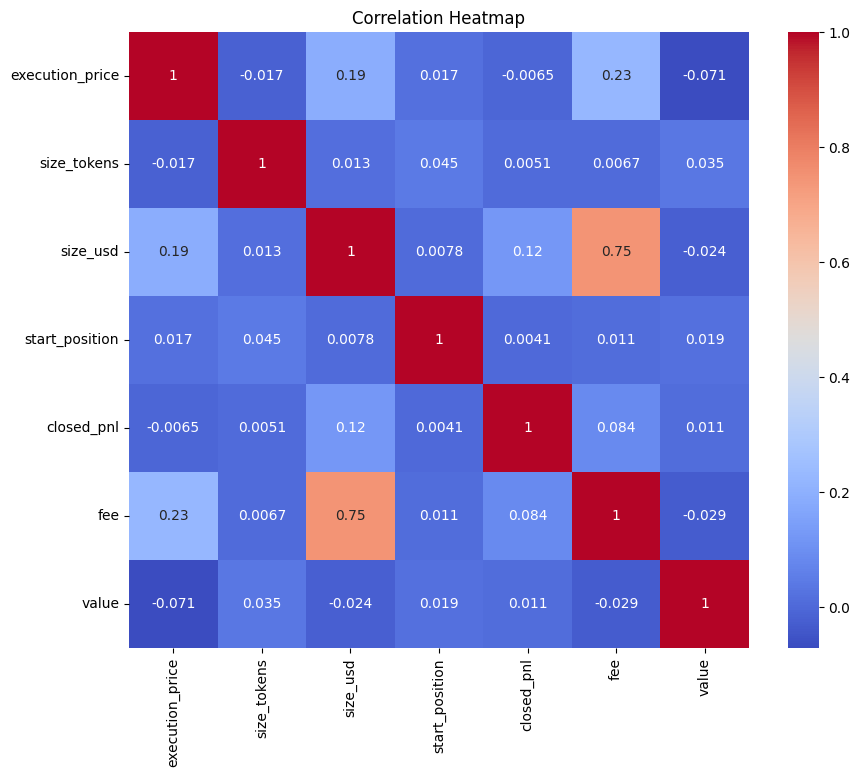

In [674]:
corr=df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.savefig('output_correlation_heatmap.png')
plt.show()

In [675]:
df['normalized_pnl'] = df['closed_pnl']/df['size_usd']

In [676]:
df.dropna(subset=['normalized_pnl'], inplace=True)
lower_bound = df['normalized_pnl'].quantile(0.01)
upper_bound = df['normalized_pnl'].quantile(0.99)
y_limit = max(abs(lower_bound), abs(upper_bound)) * 1.10
sentiment_order = ['Fear', 'Neutral', 'Greed']

Profitability vs Sentiment

/tmp/ipython-input-2438946409.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sentiment',y='normalized_pnl',data=df,order=sentiment_order,palette="coolwarm" )


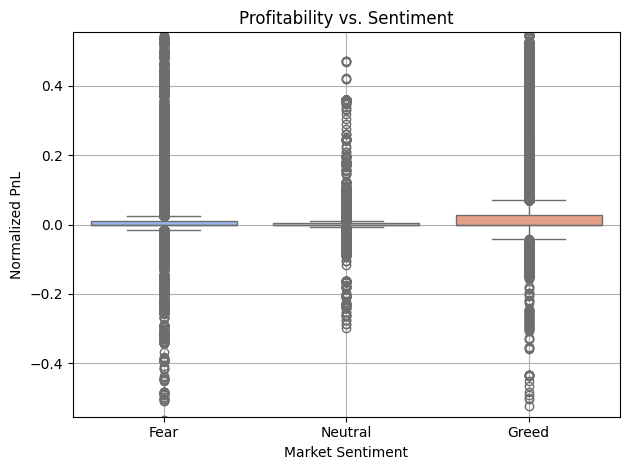

In [677]:
sns.boxplot(x='sentiment',y='normalized_pnl',data=df,order=sentiment_order,palette="coolwarm" )
plt.ylim(-y_limit, y_limit)
plt.title("Profitability vs. Sentiment")
plt.xlabel('Market Sentiment')
plt.ylabel('Normalized PnL')
plt.grid()
plt.tight_layout()
plt.savefig('output_profitability_vs_sentiment.png')
plt.show()

Average size by Sentiment

/tmp/ipython-input-247869768.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['sentiment'],y=df['size_usd'],data=df,palette='coolwarm',estimator=np.mean)


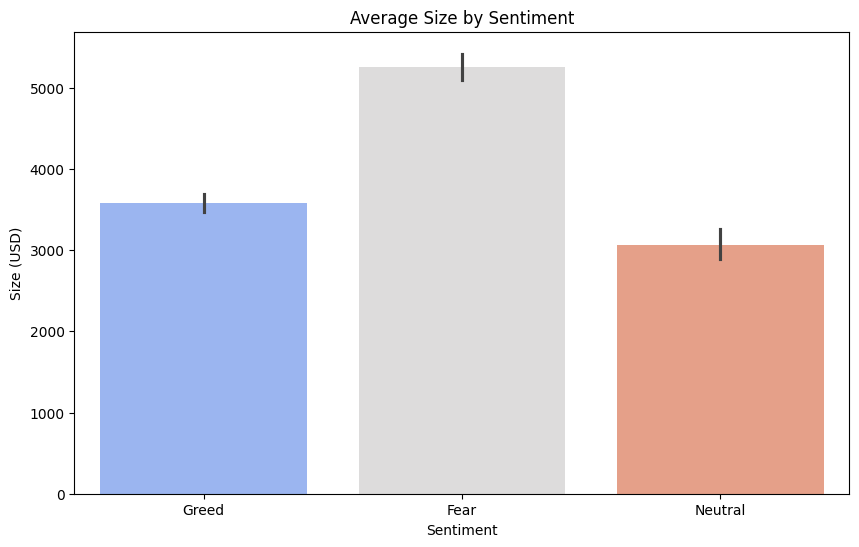

In [678]:
plt.figure(figsize=(10, 6))
sns.barplot(x=df['sentiment'],y=df['size_usd'],data=df,palette='coolwarm',estimator=np.mean)
plt.xlabel('Sentiment')
plt.ylabel('Size (USD)')
plt.title('Average Size by Sentiment')
plt.savefig('output_average_size_by_sentiment.png')
plt.show()

In [679]:
df['direction'].value_counts()

,count
direction,
Open Long,49895
Close Long,48678
Open Short,39741
Close Short,36013
Sell,19902
Buy,16716
Spot Dust Conversion,99
Short > Long,70
Long > Short,57


In [680]:
df_count=df.groupby(['sentiment','direction']).size().unstack(fill_value=0)

Direction by sentiment

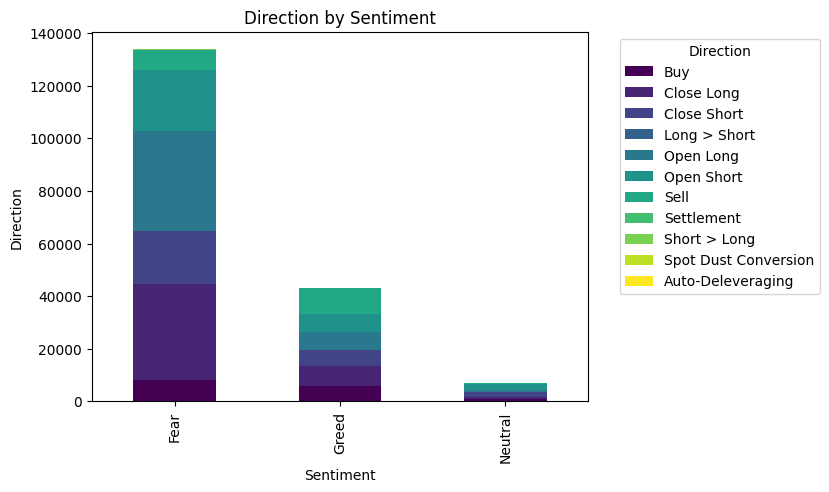

In [681]:
df_count.plot(kind='bar', stacked=True, colormap='viridis')
plt.xlabel('Sentiment')
plt.ylabel('Direction')
plt.title('Direction by Sentiment')
plt.legend(title='Direction',bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('output_direction_by_sentiment.png')
plt.show()

Trade PnL vs Size(USD)

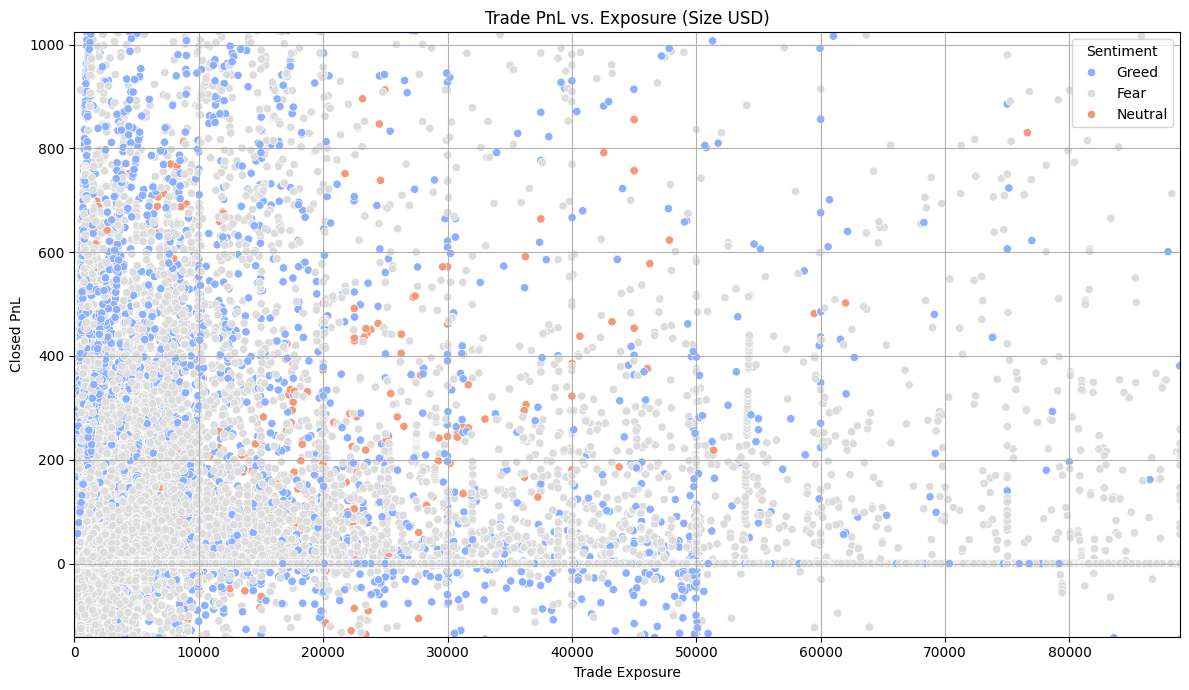

In [682]:
pnl_lower_limit = df['closed_pnl'].quantile(0.01)
pnl_upper_limit = df['closed_pnl'].quantile(0.99)
size_upper_limit = df['size_usd'].quantile(0.99)


plt.figure(figsize=(12, 7))
sns.scatterplot(x='size_usd', y='closed_pnl',hue='sentiment',data=df,palette="coolwarm")
plt.ylim(pnl_lower_limit, pnl_upper_limit)
plt.xlim(0, size_upper_limit)
plt.title('Trade PnL vs. Exposure (Size USD)')
plt.xlabel('Trade Exposure')
plt.ylabel('Closed PnL')
plt.legend(title='Sentiment')
plt.grid()
plt.tight_layout()

plt.savefig('risk_vs_exposure_scatter.png')
plt.show()

#Conclusion

This project successfully explored the relationship between trader behavior and market sentiment by merging granular trade data with the daily Fear/Greed Index.Through robust preprocessing, feature engineering (Normalized PnL, Lagged Sentiment), and Exploratory Data Analysis (EDA), we derived the following key insights:

**Profitability Signal**: Risk-adjusted profitability ($\text{Normalized PnL}$) is statistically highest during periods of Fear, strongly supporting a contrarian strategy.

**Exposure and Risk**: Trading volume and market exposure ($\text{Size USD}$) concentrate during Greed, which, while driving raw volume, correlates with increased volatility and high potential for failure.

**Predictive Value**: Correlation analysis confirmed that the daily sentiment score is a weak direct predictor of trade PnL. This validates the need for granular, trade-level features to predict outcomes.

This notebook serves as the technical documentation for the full data pipeline, covering data loading, cleaning, feature engineering, and core visualizations.